## Q2 Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import math
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from sklearn.utils import shuffle
import scipy.io as sio
plt.rcParams['figure.figsize'] = 8,8

![2](20180210_COGS118_Hw4_pic2.jpg)

### Original Data

In [2]:
X_and_Y_train = np.load('./hw4-q2-logistic-train.npy')
X_train = X_and_Y_train[:, :2]    # Shape: (70,2)
X_train = np.matrix(np.hstack((np.ones((len(X_train), 1)), X_train))) # Shape: (70, 3)
Y_train = X_and_Y_train[:, 2]    # Shape: (70,)

In [3]:
X_and_Y_test = np.load('./hw4-q2-logistic-test.npy')
X_test = X_and_Y_test[:, :2]   # Shape: (30,2)
X_test = np.matrix(np.hstack((np.ones((len(X_test), 1)), X_test))) # Shape: (30, 3)
Y_test = X_and_Y_test[:, 2]    # Shape: (70,)

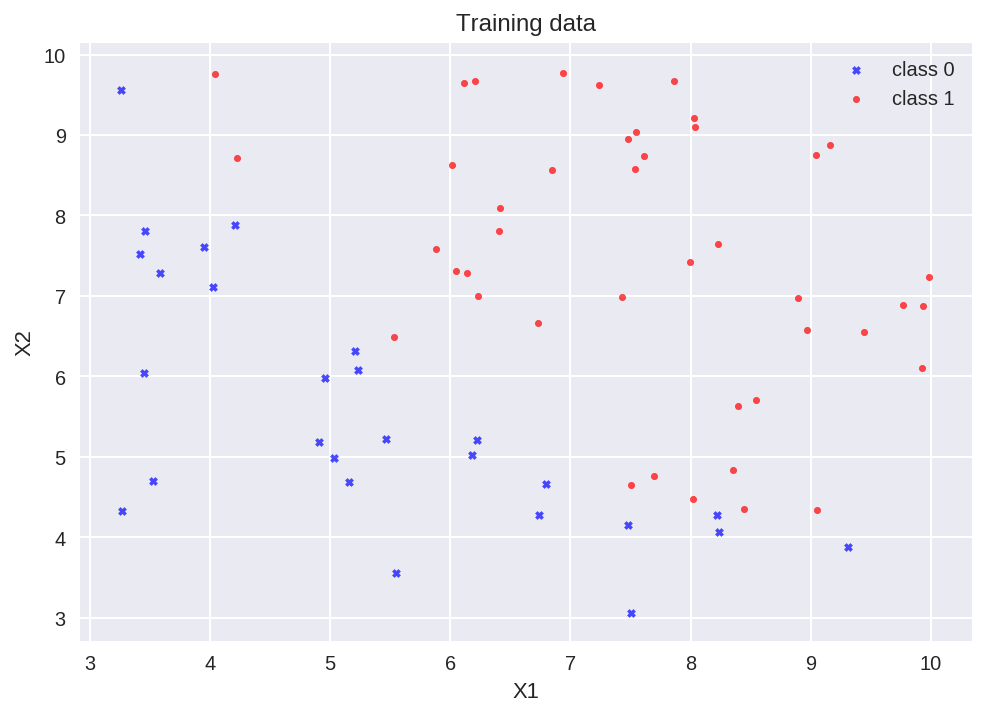

In [4]:
mpl.style.use('seaborn')

fig = plt.figure()
plt.scatter([X_train[Y_train==0, 1]], [X_train[Y_train==0, 2]], marker='x', color='b', alpha=0.7, s=10, label='class 0')
plt.scatter([X_train[Y_train==1, 1]], [X_train[Y_train==1, 2]], marker='o', color='r', alpha=0.7, s=10, label='class 1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right', fontsize=10)
plt.title('Training data')
plt.show()
#fig.savefig('scatter_1.png', format='png', dpi=400)

### Gradient Descent

In [5]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

In [6]:
# gradient of loss function L(theta)
def L_prime_theta(X, Y, theta):
    Y = Y.reshape(-1, 1)
    retVal = -((Y - sigmoid(X.dot(theta))).T.dot(X)).T
    return retVal

In [7]:
def L_theta(X, Y, theta):
    return -(Y.dot(np.log(sigmoid(X.dot(theta)))) + (1 - Y).dot(np.log(1 - sigmoid(X.dot(theta)))))

In [12]:
learning_rate = 0.001
n_iter = 10000
theta = np.zeros((X_train.shape[1], 1))
# We will keep track of training loss over iterations
iterations = [0]
L_theta_list = [L_theta(X_train, Y_train, theta)]
print(L_theta_list)
for i in range(n_iter):
    gradient = L_prime_theta(X_train, Y_train, theta)
    theta_new = theta - learning_rate * gradient
    iterations.append(i+1)
    L_theta_list.append(L_theta(X_train, Y_train, theta_new))

    if np.linalg.norm(theta_new - theta, ord = 1) < 0.001:
        print("gradient descent has converged after " + str(i) + " iterations")
        break
    theta = theta_new
    
print ("theta vector: \n" + str(theta))
print (f"L_theta_list type: {type(L_theta_list)}")
print (f"L_theta_list len: {len(L_theta_list)}")

[matrix([[ 48.52030264]])]
gradient descent has converged after 6365 iterations
theta vector: 
[[-11.48322099]
 [  0.97466299]
 [  0.88907048]]
L_theta_list type: <class 'list'>
L_theta_list len: 6367


Equation of decision boundary corresponding to optimal $\theta^*$:

$$
y = 
\begin{cases}
1 & -11.4832 + 0.9747x_1 + 0.8891x_2 \ge 0 \\
0 & -11.4832 + 0.9747x_1 + 0.8891x_2 < 0
\end{cases}
$$

### Training curve

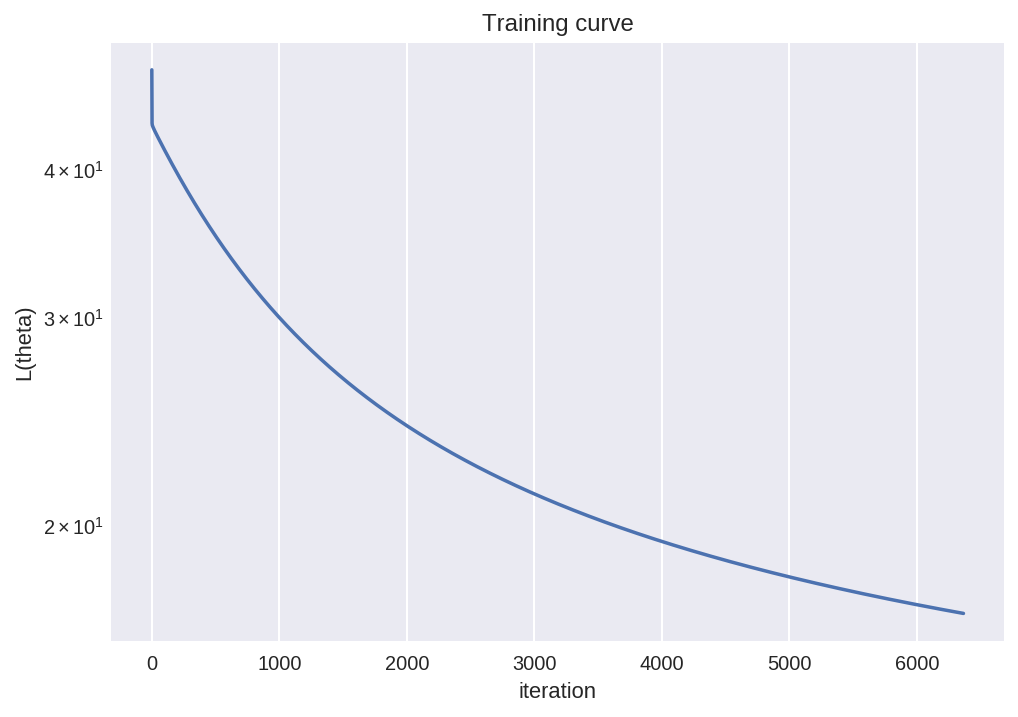

In [9]:
plt.title('Training curve')
plt.xlabel('iteration')
plt.ylabel('L(theta)')
plt.semilogy(iterations, np.array(L_theta_list).reshape(-1, 1))
plt.show()

### Results on Training data

(70, 1) (30,)
training accuracy: 0.914285714286


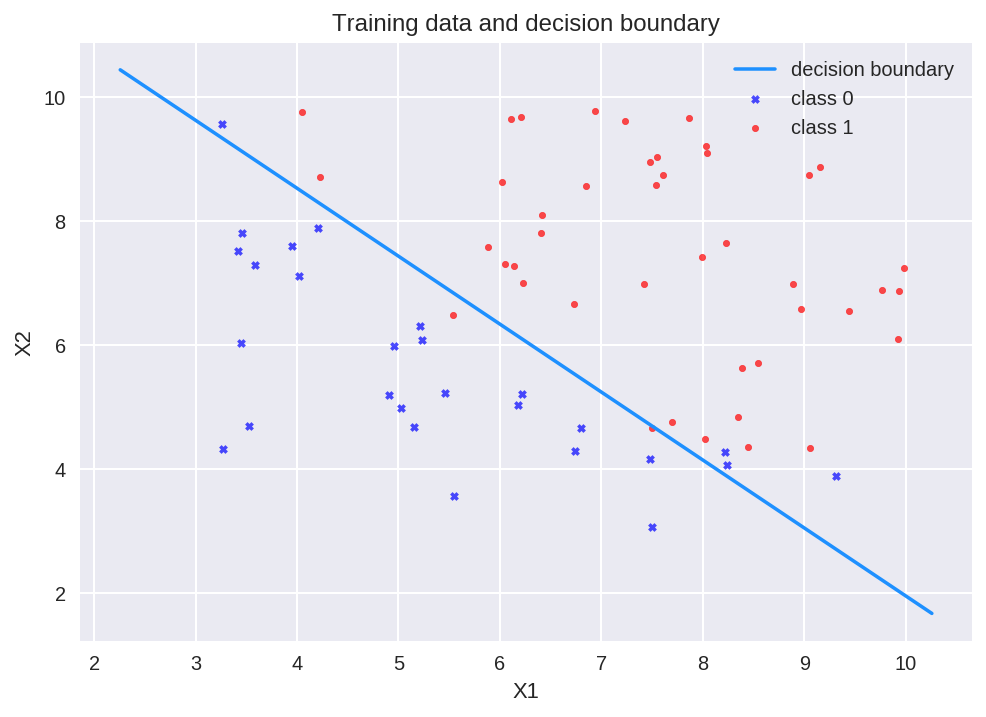

In [10]:
prediction = sigmoid(np.dot(X_train, theta)) >= 0.5
testing_accuracy = np.sum(prediction == Y_train.reshape(-1, 1))*1.0/X_train.shape[0]
print(prediction.shape, Y_test.shape)
print ("training accuracy: " + str(testing_accuracy))

x = np.arange(np.min(X_train[:,1])-1,np.max(X_train[:,1])+1,1.0)
y = (-theta[0][0]-theta[1][0]*x)/theta[2][0]
plt.scatter([X_train[Y_train==0, 1]], [X_train[Y_train==0, 2]], marker='x', color='b', alpha=0.7, s=10, label='class 0')
plt.scatter([X_train[Y_train==1, 1]], [X_train[Y_train==1, 2]], marker='o', color='r', alpha=0.7, s=10, label='class 1')


plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x,y.T, 'dodgerblue', label='decision boundary')
plt.title('Training data and decision boundary')

plt.legend(loc='upper right', fontsize=10)

### Results on Testing data

testing accuracy: 0.833333333333


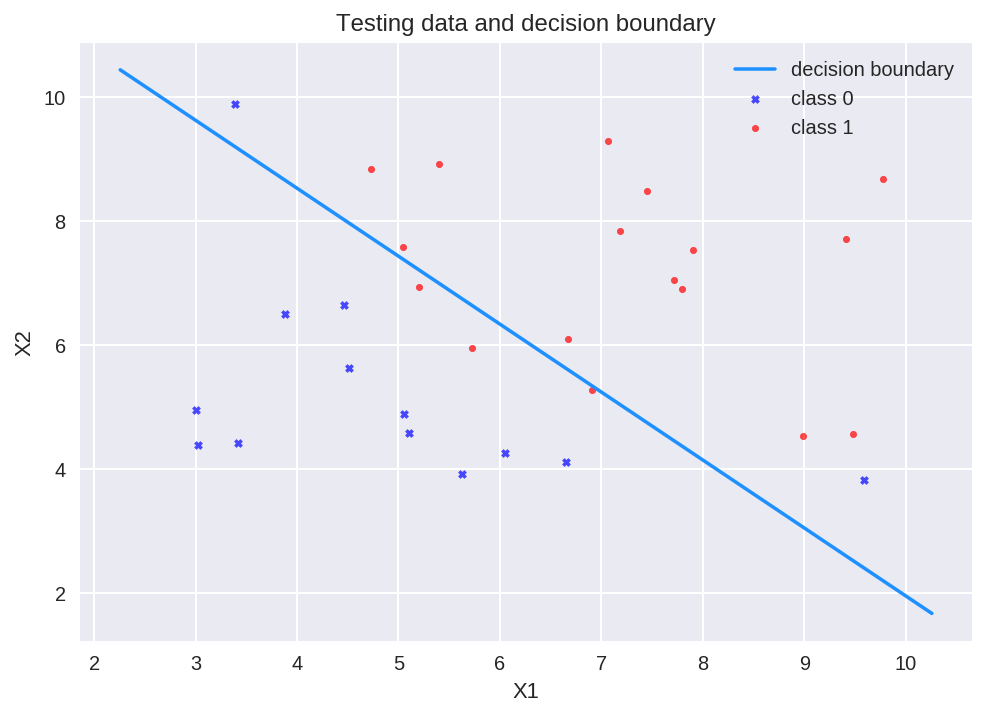

In [11]:
prediction = sigmoid(np.dot(X_test, theta)) >= 0.5
testing_accuracy = np.sum(prediction == Y_test.reshape(-1, 1))*1.0/X_test.shape[0]
print ("testing accuracy: " + str(testing_accuracy))

x = np.arange(np.min(X_train[:,1])-1,np.max(X_train[:,1])+1,1.0)
y = (-theta[0][0]-theta[1][0]*x)/theta[2][0]
plt.scatter([X_test[Y_test==0, 1]], [X_test[Y_test==0, 2]], marker='x', color='b', alpha=0.7, s=10, label='class 0')
plt.scatter([X_test[Y_test==1, 1]], [X_test[Y_test==1, 2]], marker='o', color='r', alpha=0.7, s=10, label='class 1')


plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x,y.T, 'dodgerblue', label='decision boundary')
plt.title('Testing data and decision boundary')

plt.legend(loc='upper right', fontsize=10)